In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#opening file that contains feature names

with open("C:\\Users\\Satish\\Desktop\\pre deployment\\dataset\\kddcup.names",'r') as f:
    print(f.read())


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
#taking column names and assigning them to the dataset



cols = """
  duration,
  protocol_type,
  service,
  flag,
  src_bytes,
  dst_bytes,
  land,
  wrong_fragment,
  urgent,
  hot,
  num_failed_logins,
  logged_in,
  num_compromised,
  root_shell,
  su_attempted,
  num_root,
  num_file_creations,
  num_shells,
  num_access_files,
  num_outbound_cmds,
  is_host_login,
  is_guest_login,
  count,
  srv_count,
  serror_rate,
  srv_serror_rate,
  rerror_rate,
  srv_rerror_rate,
  same_srv_rate,
  diff_srv_rate,
  srv_diff_host_rate,
  dst_host_count,
  dst_host_srv_count,
  dst_host_same_srv_rate,
  dst_host_diff_srv_rate,
  dst_host_same_src_port_rate,
  dst_host_srv_diff_host_rate,
  dst_host_serror_rate,
  dst_host_srv_serror_rate,
  dst_host_rerror_rate,
  dst_host_srv_rerror_rate
"""

columns = []
for c in cols.split(','):
    if (c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns, len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target'] 42


In [4]:
#opening the file that contains target names

with open("C:\\Users\\Satish\\Desktop\\pre deployment\\dataset\\training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
#Grouping various types of attacks into 5 classes namely normal,dos,u2r,r2l and probe

attacks_types = {
  'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'
}

In [6]:
df = pd.read_csv("dataset/kddcup.data_10_percent.gz", names=columns)

# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r: attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
#printing one record from the dataset all features and target

print(df.iloc[0])

duration                             0
protocol_type                      tcp
service                           http
flag                                SF
src_bytes                          181
dst_bytes                         5450
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            1
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                                8
srv_count                            8
serror_rate                        0.0
srv_serror_rate          

In [8]:
df.shape

(494021, 43)

In [9]:
#varoius attack types count before grouping

df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [11]:
#varoius attack types count after grouping

df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

* THE TARGET COLUMN IS GROUPED AND ALTERED SO ATTACK TYPE COLUMN CHANGES TO BE THE TARGET


In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## DATA PREPROCESSING

In [13]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### TO FIND THE COLUMNS THAT HAVE CATEGORICAL FEATURE 

#### TOTAL NO.OF COLUMNS -NO.OF COULMNS THAT HAVE NUMERICAL DATA

#### THIS GIVES COLUMNS THAT DO NOT HAVE NUMERIC VALUES

In [14]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns) - set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

### CATEGORICAL FEATURES DISTRIBUTION

In [18]:
# Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
   

Text(0.5, 1.0, 'DISTRIBUTION OF THE FEATURE PROTOCOL TYPE')

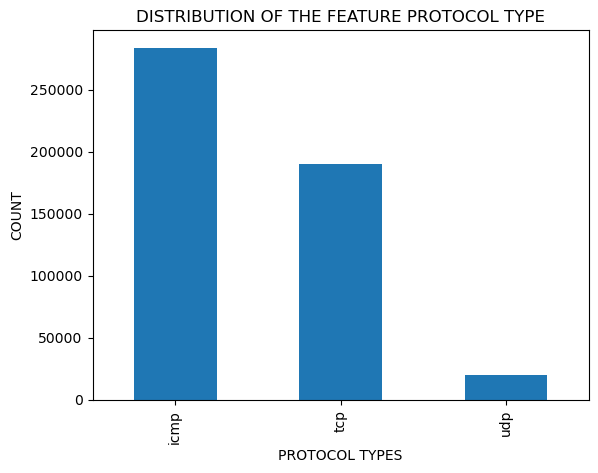

In [20]:
bar_graph('protocol_type')
plt.xlabel("PROTOCOL TYPES")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE FEATURE PROTOCOL TYPE")

Text(0.5, 1.0, 'DISTRIBUTION OF THE FEATURE SERVICE TYPE')

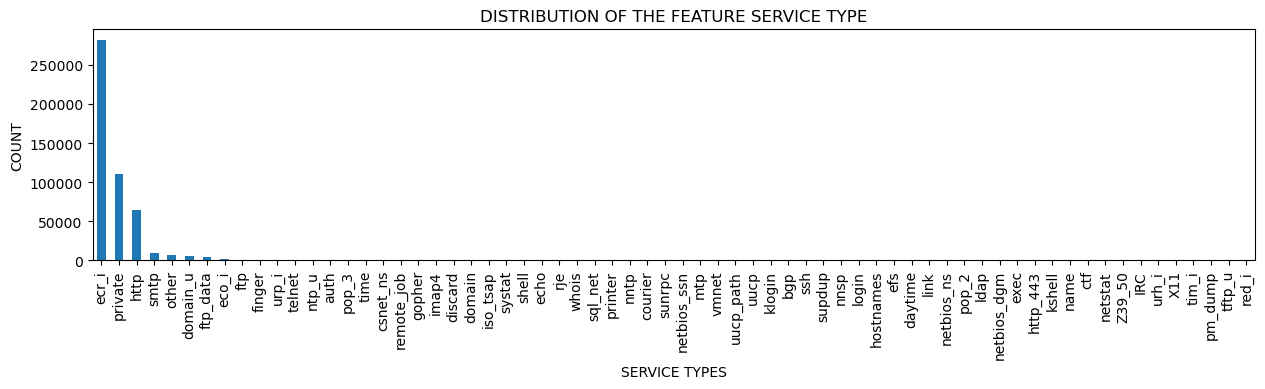

In [21]:
plt.figure(figsize=(15,3))
bar_graph('service')
plt.xlabel("SERVICE TYPES")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE FEATURE SERVICE TYPE")

Text(0.5, 1.0, 'DISTRIBUTION OF THE FEATURE FLAG TYPE')

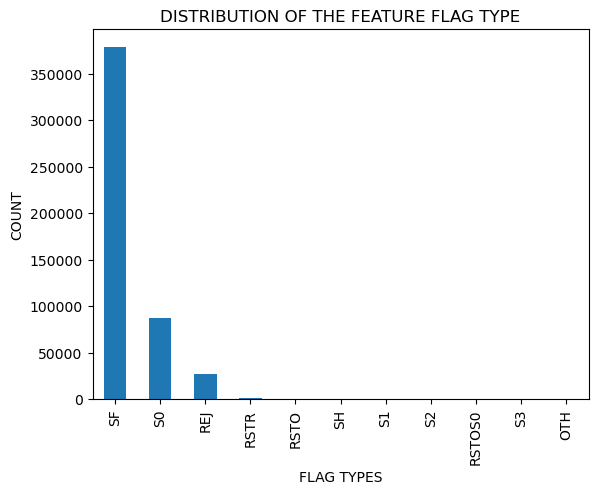

In [23]:
bar_graph('flag')
plt.xlabel("FLAG TYPES")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE FEATURE FLAG TYPE")

Text(0.5, 1.0, 'DISTRIBUTION OF THE LOGIN STATUS')

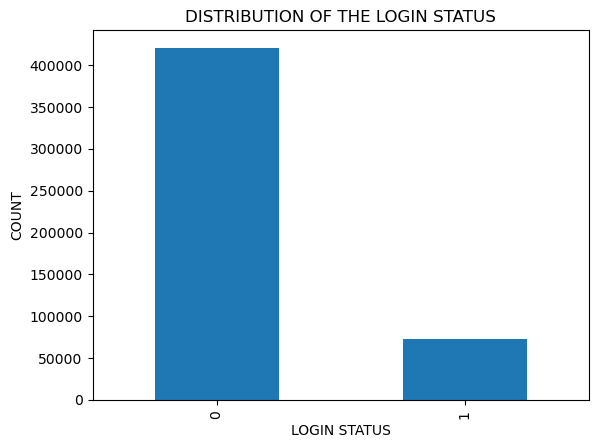

In [25]:
bar_graph('logged_in')
plt.xlabel("LOGIN STATUS")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE LOGIN STATUS")

####                      Logged_in (1 if successfully logged in; 0 otherwise)

### TARGET DISRTIBUTION

#### BEFORE GROUPING

Text(0.5, 1.0, 'DISTRIBUTION OF THE TARGET TYPE')

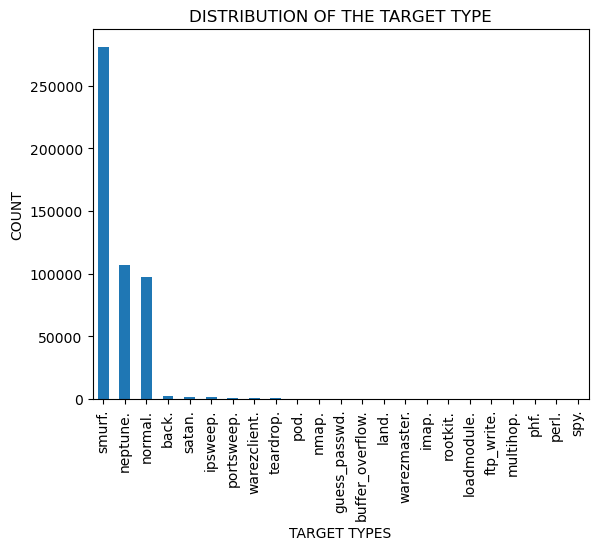

In [28]:
bar_graph('target')
plt.xlabel("TARGET TYPES")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE TARGET TYPE")

Text(0.5, 1.0, 'DISTRIBUTION OF THE ATTACK TYPE')

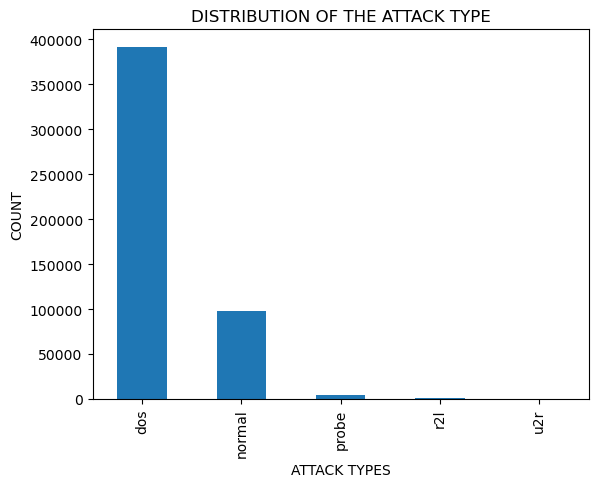

In [29]:
bar_graph('Attack Type')
plt.xlabel("ATTACK TYPES")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE ATTACK TYPE")

In [30]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

### DATA CORRELATION

C:\Users\Satish\AppData\Local\Temp\ipykernel_12548\3249487481.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\Satish\AppData\Local\Temp\ipykernel_12548\3249487481.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


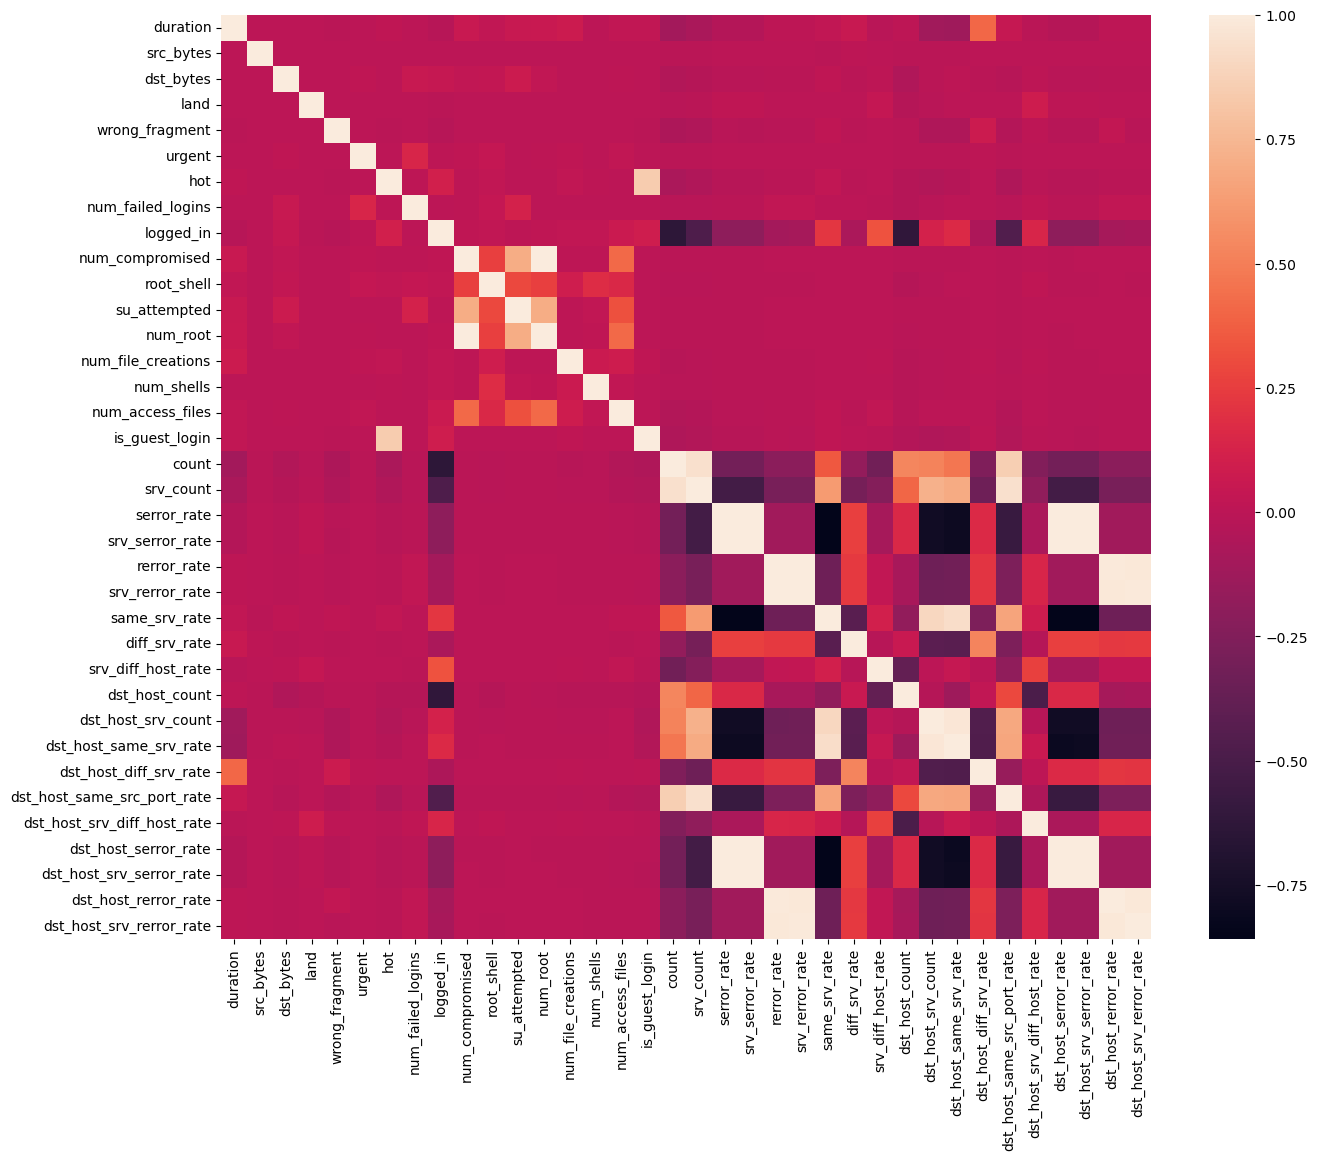

In [31]:
df = df.dropna('columns') # drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

#### DROPPING  FETAURES THAT ARE CORRELATED TO EACH OTHER

In [32]:
df['num_root'].corr(df['num_compromised'])

0.9938277978750971

In [33]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725553

In [34]:
df['srv_count'].corr(df['count'])

0.9436670688873966

In [35]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539823285

In [36]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.973685457296524

In [37]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173370796

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371108135

In [39]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342693468

In [40]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630321118

In [41]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676771811

In [42]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680107838

In [43]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003731405

In [44]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485672809

In [45]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091845912

In [46]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956788

In [47]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427309738

In [48]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540753726

In [49]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438849232

#### THE FEATURES CORRELATION ARE FOUND AND DROPPED WHEN THE VALUE IN NEAREST TO 1

In [50]:
df.drop('num_root', axis=1, inplace=True)

df.drop('srv_serror_rate', axis=1, inplace=True)

df.drop('srv_rerror_rate', axis=1, inplace=True)

df.drop('dst_host_srv_serror_rate', axis=1, inplace=True)

df.drop('dst_host_serror_rate', axis=1, inplace=True)

df.drop('dst_host_rerror_rate', axis=1, inplace=True)

df.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)

df.drop('dst_host_same_srv_rate', axis=1, inplace=True)

In [51]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [52]:
df.shape

(494021, 33)

#### THE NO.OF FEATURES HAS BEEN REDUCED TO 32 FROM 42

In [53]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [54]:
df_std = df.std()
df_std = df_std.sort_values(ascending=True)
df_std

C:\Users\Satish\AppData\Local\Temp\ipykernel_12548\2713124126.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

### FEATURE MAPPING

In [55]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [56]:
# protocol_type feature mapping
pmap = {
  'icmp': 0,
  'tcp': 1,
  'udp': 2
}

df['protocol_type'] = df['protocol_type'].map(pmap)

In [57]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [58]:
# flag feature mapping
fmap = {
  'SF': 0,
  'S0': 1,
  'REJ': 2,
  'RSTR': 3,
  'RSTO': 4,
  'SH': 5,
  'S1': 6,
  'S2': 7,
  'RSTOS0': 8,
  'S3': 9,
  'OTH': 10
}

df['flag'] = df['flag'].map(fmap)

In [59]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


#### SERVICE COLUMN SEEMS TO HAVE SAME VALUES SO WILL DROP THAT FEATURE

In [60]:
df.drop('service', axis=1, inplace=True)

In [61]:
df.shape

(494021, 32)

In [62]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


### Checking for balancing data

Text(0.5, 1.0, 'DISTRIBUTION OF THE ATTACK TYPE')

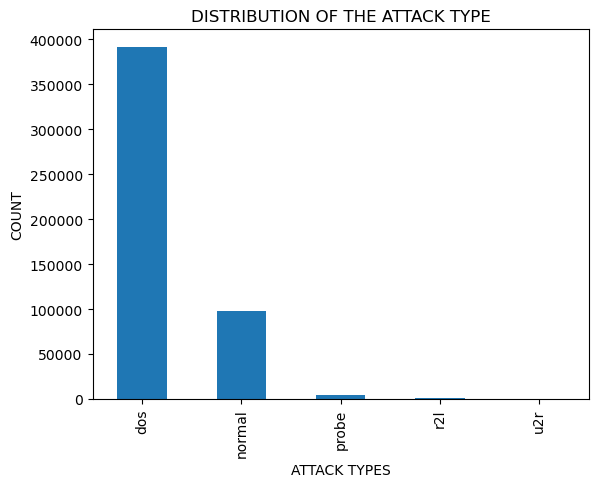

In [63]:
bar_graph('Attack Type')
plt.xlabel("ATTACK TYPES")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF THE ATTACK TYPE")

#### ATTACK TYPE COLUMN IS GOING TO BE  THE TARGET SO DROP  ACTUAL TARGET COLUMN

In [64]:
df = df.drop(['target',], axis=1)
print(df.shape)


(494021, 31)


#### WRITING THIS DATAFRAME TO A CSV FILE 


In [65]:
file_path = "C:\\Users\\Satish\\Desktop\\pre deployment\\dataset\\PRE PROCESSED DATA.csv"
df.to_csv(file_path, index=False)

In [66]:
data=pd.read_csv("C:\\Users\\Satish\\Desktop\\pre deployment\\dataset\\PRE PROCESSED DATA.csv")
data.head(2)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal


 ### OVERSAMPLING TO THE PREPROCESSED DATA TO MAKE IT BALANCE USING SMOTE

In [67]:
x= data.drop(columns=['Attack Type'])
y= data['Attack Type']


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)



In [70]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


print("Class Distribution Before SMOTE:")
print( x_train)
print(y_train)


print("\nClass Distribution After SMOTE:")
print(x_train_resampled)
print(y_train_resampled)

Class Distribution Before SMOTE:
        duration  protocol_type  flag  src_bytes  dst_bytes  land  \
98170          0              0     0       1032          0     0   
428761         0              0     0        520          0     0   
115380         0              1     1          0          0     0   
164325         0              0     0       1032          0     0   
378683         0              1     1          0          0     0   
...          ...            ...   ...        ...        ...   ...   
246940         0              0     0       1032          0     0   
71873          0              1     1          0          0     0   
117089         0              1     1          0          0     0   
239769         0              0     0       1032          0     0   
84510          0              1     0        340        310     0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  serror_rate  \
98170                0       0    0                  0  ...   

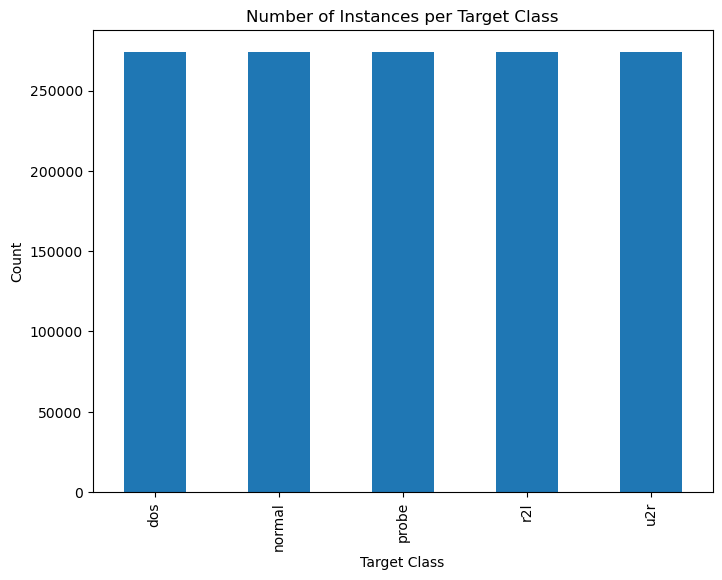

In [73]:
class_counts = y_train_resampled.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Number of Instances per Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')

plt.show()


#### AFTER USING SMOTE BALANCING OF DATA IS ACHIEVED

#### WRITING THE RESAMPLED ( BALANCED DATA ) TO A CSV FILE

In [74]:
resampled_df = pd.DataFrame(x_train_resampled, columns=x_train.columns)
resampled_df['Attack Type'] = y_train_resampled

output_path ="C:\\Users\\Satish\\Desktop\\pre deployment\\dataset\\RESAMPLED BALANCED  DATA.csv"

resampled_df.to_csv(output_path, index=False)

print("Resampled data has been saved to:", output_path)

Resampled data has been saved to: C:\Users\Satish\Desktop\pre deployment\dataset\RESAMPLED BALANCED  DATA.csv


#### MODEL TRAINING IS SEPERATE FILE 